# Throughput Analysis 

This notebook compares the messaging throughput of three Go systems libraries:

1. ZMQ REP/REQ sockets (rep) 
2. ZMQ ROUTER/DEALER sockets (router) 
3. gRPC HTTP connection (grpc) 

The code for the implementations can be found at [github.com/bbengfort/rtreq](https://github.com/bbengfort/rtreq) and [github.com/bbengfort/echo](https://github.com/bbengfort/echo). 

## Data Loading

In [1]:
%matplotlib inline 

import os 
import json 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from collections import defaultdict

sns.set_context('poster')
sns.set_style('whitegrid')
sns.set_palette('Set1')

In [2]:
# Fixtures and constants 
FIXTURES = os.path.join(".", "fixtures")
RESULTS = os.path.join(FIXTURES, "results")
DATA = os.path.join(RESULTS, "results.csv")
DATA = os.path.join(RESULTS, "metrics.csv")

SAVEFIG = True 
CLUSTER = "EC2"

In [3]:
results = pd.read_csv(DATA)
results

,clients,system,accesses,server,host,throughput,duration,mean
0,1,grpc,67638,grpc,54.152.206.167,2255.705591,29.985296067s,67638.000000
1,2,grpc,128334,grpc,54.152.206.167,4148.647188,30.933939228s,64167.000000
2,3,grpc,187145,grpc,54.152.206.167,5990.655079,31.239488426s,62381.666667
3,4,grpc,225325,grpc,54.152.206.167,7373.733906,30.557788343s,56331.250000
4,5,grpc,285228,grpc,54.152.206.167,9311.945347,30.63033441s,57045.600000
5,6,grpc,324138,grpc,54.152.206.167,10628.504870,30.497045819s,54023.000000
6,7,grpc,337614,grpc,54.152.206.167,11069.519842,30.499425884s,48230.571429
7,8,grpc,358555,grpc,54.152.206.167,11805.072940,30.372959304s,44819.375000
8,9,grpc,383988,grpc,54.152.206.167,12705.444552,30.222319135s,42665.333333
9,10,grpc,417896,grpc,54.152.206.167,13734.367428,30.42702929s,41789.600000


## Throughput Over Clients 

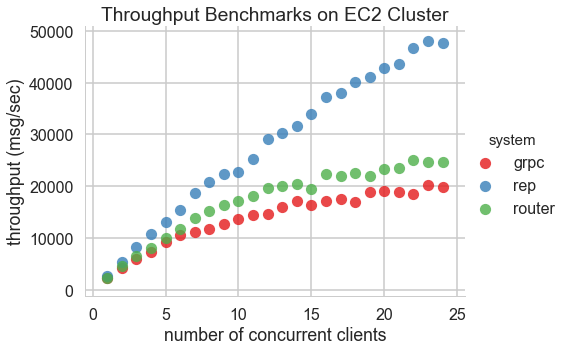

In [4]:
g = sns.lmplot(
    x="clients", y="throughput", hue="system", 
    fit_reg=False, si aspect=1.4,
    data=results, markers=["o", "x", "D"],

)

ax = g.axes[0][0]
ax.set_ylabel("throughput (msg/sec)")
ax.set_xlabel("number of concurrent clients")
ax.set_title("Throughput Benchmarks on {} Cluster".format(CLUSTER))

if SAVEFIG:
    plt.savefig("{}/throughput-{}-scatter.pdf".format(RESULTS, CLUSTER))
    plt.savefig("{}/throughput-{}-scatter.png".format(RESULTS, CLUSTER))

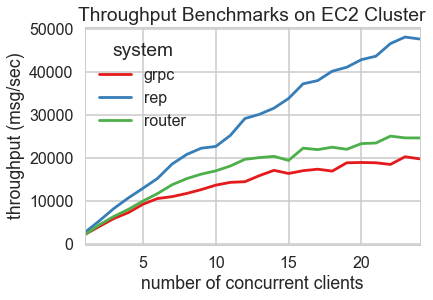

In [5]:
df = results.pivot('clients', columns='system')['throughput']
g = df.plot()
g.set_ylabel("throughput (msg/sec)")
g.set_xlabel("number of concurrent clients")
g.set_title("Throughput Benchmarks on {} Cluster".format(CLUSTER))

if SAVEFIG:
    plt.savefig("{}/throughput-{}-lines.pdf".format(RESULTS, CLUSTER))
    plt.savefig("{}/throughput-{}-lines.png".format(RESULTS, CLUSTER))